In [1]:
import pandas as pd

# Replace 'your_dataset.csv' with the path to your dataset
df = pd.read_csv('CleanedGameStats.csv')
# Display the first few rows of the dataframe
df.head()


,Date,Home,Away,HomeWins,HPassCmp,APassCmp,HPassAtt,APassAtt,HPassPct,APassPct,...,HFGPercent,AFGPercent,HKickPts,AKickPts,HFum,AFum,HInt,AInt,HTotalTO,ATotalTO
0,9/4/2015,Georgia State,Charlotte,0,25,19,43,32,58.1,59.4,...,66.7,100.0,8,11,2,2,1,2,3,4
1,9/4/2015,Western Michigan,Michigan State,0,33,15,50,31,66.0,48.4,...,50.0,100.0,6,7,0,1,2,0,2,1
2,9/3/2015,Central Michigan,Oklahoma State,0,29,22,42,32,69.0,68.8,...,100.0,33.3,7,6,0,0,1,0,1,0
3,9/3/2015,Hawaii,Colorado,1,19,23,38,40,50.0,57.5,...,100.0,100.0,8,8,0,2,2,1,2,3
4,9/3/2015,Idaho,Ohio,0,36,20,48,25,75.0,80.0,...,100.0,50.0,8,9,1,1,2,0,3,1


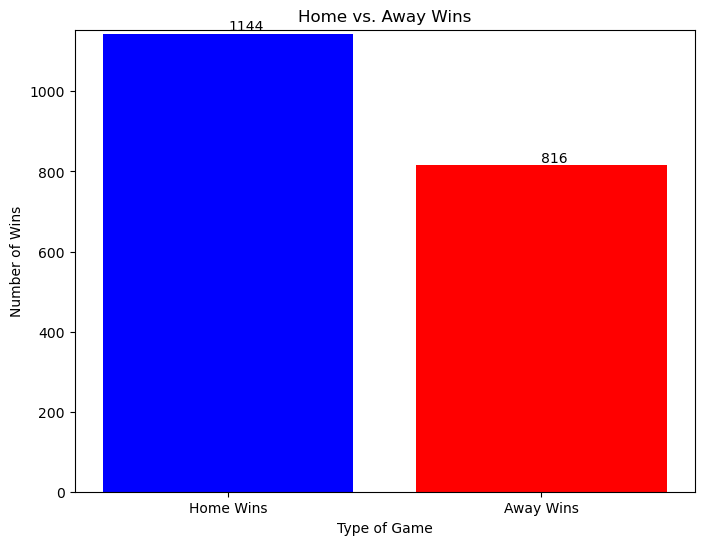

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('CleanedGameStats.csv') 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Converts the 'Date' column to datetime, handling errors

# Check if the conversion worked and print out the dtype
print(df['Date'].dtype)  # Should output: datetime64[ns]

# Calculating wins
home_wins = df['HomeWins'].sum()
away_wins = len(df) - home_wins  #'HomeWins' is 1 for home win, 0 for home loss (which means away win)

# Creating the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(['Home Wins', 'Away Wins'], [home_wins, away_wins], color=['blue', 'red'])
plt.xlabel('Type of Game')
plt.ylabel('Number of Wins')
plt.title('Home vs. Away Wins')
plt.ylim(0, max(home_wins, away_wins) + 10)  # Add some space at the top for annotations

# Adding the data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment

plt.show()


AttributeError: 'str' object has no attribute 'strftime'

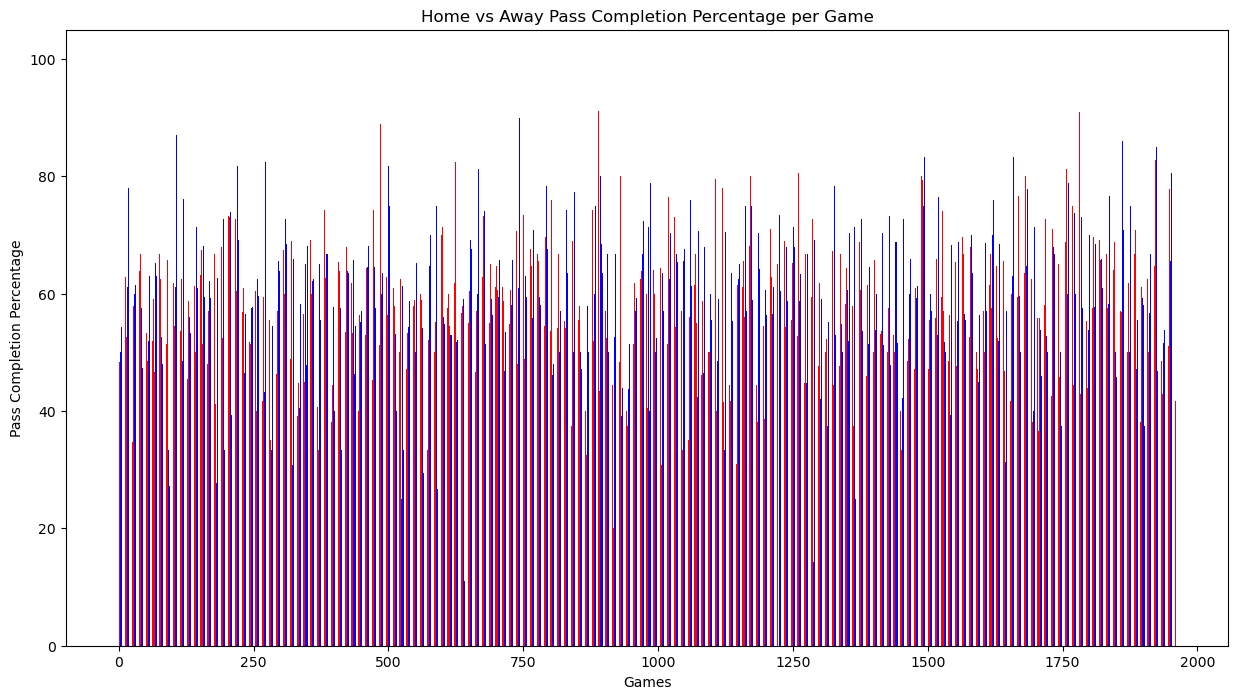

In [8]:
plt.figure(figsize=(15, 8))
# Calculate the number of games to plot
num_games = df.shape[0]

# Creating side-by-side bars
r1 = range(num_games)
r2 = [x + 0.3 for x in r1]

plt.bar(r1, df['HPassPct'], color='blue', width=0.3, label='Home Pass Completion %')
plt.bar(r2, df['APassPct'], color='red', width=0.3, label='Away Pass Completion %')

plt.xlabel('Games')
plt.ylabel('Pass Completion Percentage')
plt.title('Home vs Away Pass Completion Percentage per Game')

# Using the .dt accessor now that 'Date' is definitely a datetime object
# We need to ensure that the 'Date' column has no NaT values after coercion
if df['Date'].isnull().any():
    print("Warning: Some dates couldn't be parsed and are set as NaT (Not a Time)")

# Set x-ticks
plt.xticks([r + 0.15 for r in range(num_games)], [date.strftime('%m/%d') for date in df['Date'].dropna()], rotation=90)

plt.legend()
plt.show()

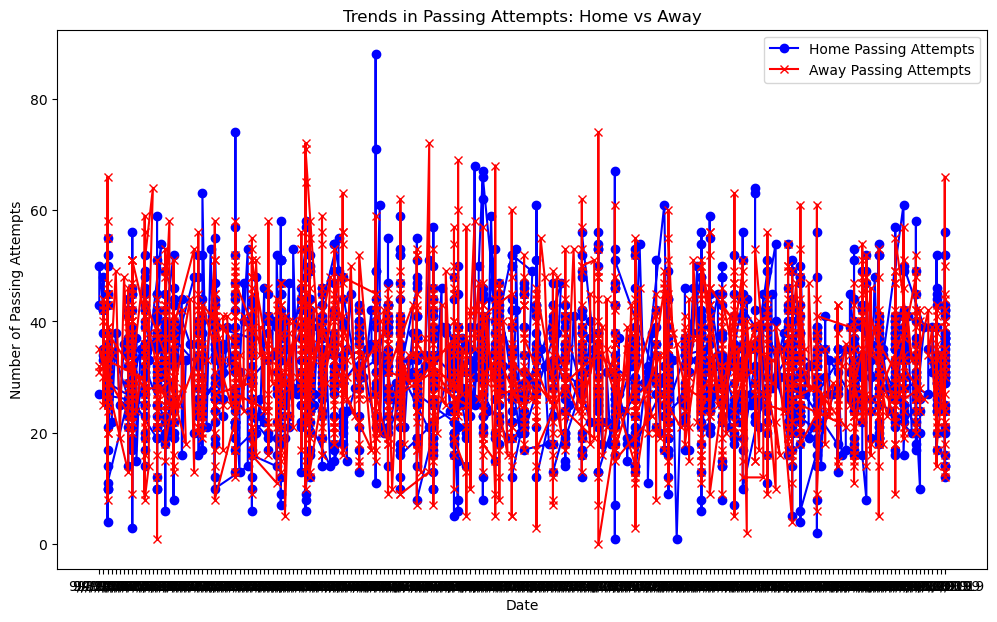

In [4]:
df['Cumulative Home Pass Attempts'] = df['HPassAtt'].cumsum()
df['Cumulative Away Pass Attempts'] = df['APassAtt'].cumsum()

plt.figure(figsize=(12, 7))
plt.plot(df['Date'], df['Cumulative Home Pass Attempts'], label='Cumulative Home Passing Attempts', marker='o', color='blue')
plt.plot(df['Date'], df['Cumulative Away Pass Attempts'], label='Cumulative Away Passing Attempts', marker='x', color='red')
plt.xlabel('Date')
plt.ylabel('Cumulative Number of Passing Attempts')
plt.title('Cumulative Passing Attempts: Home vs Away')
plt.legend()
plt.show()
